# Load Dataset

In [2]:
# set up notebook
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlalchemy
import seaborn as sns

In [3]:
# read the admissions table
df_adm = pd.read_csv('ADMISSIONS.csv')
df_pat = pd.read_csv('PATIENTS.csv')
df_icu = pd.read_csv('ICUSTAYS.csv')
df_presc = pd.read_csv('PRESCRIPTIONS.csv')

/Users/kexinzhang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df_ineven = pd.read_csv('INPUTEVENTS_CV.csv')

/Users/kexinzhang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7,9,17,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df_dicd_dia = pd.read_csv('D_ICD_DIAGNOSES.csv')

In [6]:
#df_proce = pd.read_csv('PROCEDUREEVENTS_MV.csv')

In [7]:
df_dia_icd = pd.read_csv('DIAGNOSES_ICD.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')

In [205]:
df_proce = pd.read_csv('PROCEDURES_ICD.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')

In [9]:
df_d_proce = pd.read_csv('D_ICD_PROCEDURES.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')

# Count Number of Total People (Whole Data)

In [10]:
df_pat.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [11]:
df_pat.GENDER.value_counts()

M    26121
F    20399
Name: GENDER, dtype: int64

In [12]:
gender_total = df_pat.SUBJECT_ID.nunique()
print("Total number of patient is :", gender_total )

Total number of patient is : 46520


#### Convert dates

In [13]:
#df_pat.DOB = pd.to_datetime(df_pat.DOB, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
#df_pat.DOD = pd.to_datetime(df_pat.DOD, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
#df_adm.ADMITTIME = pd.to_datetime(df_adm.ADMITTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

#df_pat.DOB = pd.to_datetime(df_pat.DOB).dt.date
#df_adm.ADMITTIME = pd.to_datetime(df_adm.ADMITTIME).dt.date

#type(df_pat.DOB[1])

In [14]:
df_pat.sort_values(by=['SUBJECT_ID'])

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
222,1,2,M,2138-07-17 00:00:00,NaN,NaN,NaN,0
223,2,3,M,2025-04-11 00:00:00,2102-06-14 00:00:00,NaN,2102-06-14 00:00:00,1
224,3,4,F,2143-05-12 00:00:00,NaN,NaN,NaN,0
225,4,5,M,2103-02-02 00:00:00,NaN,NaN,NaN,0
226,5,6,F,2109-06-21 00:00:00,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...
41091,46516,99985,M,2127-04-08 00:00:00,NaN,NaN,NaN,0
41092,46517,99991,M,2137-04-07 00:00:00,NaN,NaN,NaN,0
41093,46518,99992,F,2078-10-17 00:00:00,NaN,NaN,NaN,0
41094,46519,99995,F,2058-05-29 00:00:00,2147-09-29 00:00:00,NaN,2147-09-29 00:00:00,1


# Count Ethnicity, Marital status, and Admission type (Whole Data)

In [15]:
# Summarize Ethnicity
regex_black = '(BLACK(/| )([A-Z]| )*)'
df_adm['ETHNICITY'] = df_adm['ETHNICITY'].str.replace(regex_black, 'BLACK')

regx_white = '(WHITE - [A-Z ]*)'
df_adm['ETHNICITY'] = df_adm['ETHNICITY'].str.replace(regx_white, 'WHITE')

regx_asian = '(ASIAN (- )?[A-Z ]*)'
df_adm['ETHNICITY'] = df_adm['ETHNICITY'].str.replace(regx_asian, 'ASIAN')

regx_hispanic = '(HISPANIC/LATINO - [A-Z \(\)]*)|(HISPANIC OR LATINO([A-Z \(\)]*))'
df_adm['ETHNICITY'] = df_adm['ETHNICITY'].str.replace(regx_hispanic, 'HISPANIC OR LATINO')

/var/folders/73/37k4t3k50d7gry5vs9_z5yth0000gn/T/ipykernel_9786/2112481919.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_adm['ETHNICITY'] = df_adm['ETHNICITY'].str.replace(regex_black, 'BLACK')
/var/folders/73/37k4t3k50d7gry5vs9_z5yth0000gn/T/ipykernel_9786/2112481919.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_adm['ETHNICITY'] = df_adm['ETHNICITY'].str.replace(regx_white, 'WHITE')
/var/folders/73/37k4t3k50d7gry5vs9_z5yth0000gn/T/ipykernel_9786/2112481919.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df_adm['ETHNICITY'] = df_adm['ETHNICITY'].str.replace(regx_asian, 'ASIAN')
/var/folders/73/37k4t3k50d7gry5vs9_z5yth0000gn/T/ipykernel_9786/2112481919.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df_adm['ETHNICITY'] = df_adm['ETHNICITY'].str.replace(regx_hispan

#### Dropping Duplicate Subject_id

In [16]:
df_uniadm = df_adm.drop_duplicates(subset=["SUBJECT_ID"], keep='last')

In [17]:
df_uniadm.sort_values(by=['SUBJECT_ID'])

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
211,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1
212,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1
213,3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,2191-03-15 13:10:00,2191-03-16 01:10:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1
214,4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,BUDDHIST,NaN,ASIAN,NaN,NaN,NEWBORN,0,1
215,5,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CHRONIC RENAL FAILURE/SDA,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56435,58972,99985,176670,2181-01-27 02:47:00,2181-02-12 17:05:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,ENGL,JEWISH,MARRIED,WHITE,2181-01-26 23:35:00,2181-01-27 04:18:00,FEVER,0,1
56436,58973,99991,151118,2184-12-24 08:30:00,2185-01-05 12:15:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,DIVERTICULITIS/SDA,0,1
56437,58974,99992,197084,2144-07-25 18:03:00,2144-07-28 17:56:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2144-07-25 13:40:00,2144-07-25 18:50:00,RETROPERITONEAL HEMORRHAGE,0,1
56565,58975,99995,137810,2147-02-08 08:00:00,2147-02-11 13:15:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,ABDOMINAL AORTIC ANEURYSM/SDA,0,1


#### Combine patient and admission df

In [18]:
df_merge=pd.merge(df_pat, df_uniadm, how='outer', on='SUBJECT_ID')

In [19]:
df_merge.head()

,ROW_ID_x,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ROW_ID_y,HADM_ID,...,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0,323,158975,...,Medicare,ENGL,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1,324,124271,...,Self Pay,HAIT,NOT SPECIFIED,SINGLE,BLACK,2188-11-12 06:56:00,2188-11-12 10:10:00,PNEUMONIA;R/O TB,1,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0,325,117937,...,Private,NaN,OTHER,NaN,UNKNOWN/NOT SPECIFIED,2110-07-27 05:00:00,2110-07-27 07:15:00,INTRACRANIAL HEAD BLEED,0,1
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0,327,193470,...,Private,NaN,UNOBTAINABLE,SINGLE,WHITE,2133-08-15 01:42:00,2133-08-15 04:45:00,GASTROINTESINAL BLEED,0,1
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0,328,176189,...,Medicare,NaN,CATHOLIC,WIDOWED,WHITE,NaN,NaN,COMPLETE HEART BLOCK\PACEMAKER IMPLANT,0,1


In [20]:
df_merge_female = df_merge[df_merge.GENDER == 'F']
df_merge_male = df_merge[df_merge.GENDER == 'M']

## Count Ethnicity

In [21]:
# total count & prob for each ethnicity
num_rac = df_uniadm.ETHNICITY.value_counts()
rac_prob = df_merge.groupby('ETHNICITY').size().div(len(df_merge))*100

In [22]:
rac_prob.sort_values(ascending=False)

ETHNICITY
WHITE                                                       69.587274
UNKNOWN/NOT SPECIFIED                                        8.886500
BLACK                                                        8.303955
ASIAN                                                        3.632846
HISPANIC OR LATINO                                           3.529665
OTHER                                                        2.770851
UNABLE TO OBTAIN                                             1.691745
PATIENT DECLINED TO ANSWER                                   1.051161
MULTI RACE ETHNICITY                                         0.234308
AMERICAN INDIAN/ALASKA NATIVE                                0.094583
PORTUGUESE                                                   0.085985
MIDDLE EASTERN                                               0.060189
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER                    0.032244
CARIBBEAN ISLAND                                             0.017197
SOUTH AMER

In [23]:
num_rac

WHITE                                                       32372
UNKNOWN/NOT SPECIFIED                                        4134
BLACK                                                        3863
ASIAN                                                        1690
HISPANIC OR LATINO                                           1642
OTHER                                                        1289
UNABLE TO OBTAIN                                              787
PATIENT DECLINED TO ANSWER                                    489
MULTI RACE ETHNICITY                                          109
AMERICAN INDIAN/ALASKA NATIVE                                  44
PORTUGUESE                                                     40
MIDDLE EASTERN                                                 28
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER                      15
SOUTH AMERICAN                                                  8
CARIBBEAN ISLAND                                                8
AMERICAN I

In [24]:
# total count for ethnicity in female
num_rac_F = df_merge_female.ETHNICITY.value_counts()
rac_female_prob = df_merge_female.groupby('ETHNICITY').size().div(len(df_merge_female))*100

In [25]:
rac_female_prob.sort_values(ascending=False)

ETHNICITY
WHITE                                                       69.106329
BLACK                                                       10.054414
UNKNOWN/NOT SPECIFIED                                        8.343546
ASIAN                                                        3.647238
HISPANIC OR LATINO                                           3.235453
OTHER                                                        2.480514
UNABLE TO OBTAIN                                             1.583411
PATIENT DECLINED TO ANSWER                                   1.004951
MULTI RACE ETHNICITY                                         0.245110
AMERICAN INDIAN/ALASKA NATIVE                                0.093142
PORTUGUESE                                                   0.093142
MIDDLE EASTERN                                               0.044120
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER                    0.034315
SOUTH AMERICAN                                               0.019609
CARIBBEAN 

In [26]:
num_rac_F

WHITE                                                       14097
BLACK                                                        2051
UNKNOWN/NOT SPECIFIED                                        1702
ASIAN                                                         744
HISPANIC OR LATINO                                            660
OTHER                                                         506
UNABLE TO OBTAIN                                              323
PATIENT DECLINED TO ANSWER                                    205
MULTI RACE ETHNICITY                                           50
AMERICAN INDIAN/ALASKA NATIVE                                  19
PORTUGUESE                                                     19
MIDDLE EASTERN                                                  9
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER                       7
SOUTH AMERICAN                                                  4
CARIBBEAN ISLAND                                                2
AMERICAN I

In [27]:
# total count for ethnicity in male
num_rac_M = df_merge_male.ETHNICITY.value_counts()
rac_male_prob = df_merge_male.groupby('ETHNICITY').size().div(len(df_merge_male))*100

In [28]:
rac_male_prob.sort_values(ascending=False)

ETHNICITY
WHITE                                                       69.962865
UNKNOWN/NOT SPECIFIED                                        9.310516
BLACK                                                        6.936947
HISPANIC OR LATINO                                           3.759427
ASIAN                                                        3.621607
OTHER                                                        2.997588
UNABLE TO OBTAIN                                             1.776349
PATIENT DECLINED TO ANSWER                                   1.087248
MULTI RACE ETHNICITY                                         0.225872
AMERICAN INDIAN/ALASKA NATIVE                                0.095708
PORTUGUESE                                                   0.080395
MIDDLE EASTERN                                               0.072738
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER                    0.030627
CARIBBEAN ISLAND                                             0.022970
SOUTH AMER

In [29]:
num_rac_M

WHITE                                                       18275
UNKNOWN/NOT SPECIFIED                                        2432
BLACK                                                        1812
HISPANIC OR LATINO                                            982
ASIAN                                                         946
OTHER                                                         783
UNABLE TO OBTAIN                                              464
PATIENT DECLINED TO ANSWER                                    284
MULTI RACE ETHNICITY                                           59
AMERICAN INDIAN/ALASKA NATIVE                                  25
PORTUGUESE                                                     21
MIDDLE EASTERN                                                 19
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER                       8
CARIBBEAN ISLAND                                                6
SOUTH AMERICAN                                                  4
AMERICAN I

## Count Admission Type

In [30]:
# total number of admission
num_adm = df_uniadm.ADMISSION_TYPE.value_counts()
adm_prob = df_merge.groupby('ADMISSION_TYPE').size().div(len(df_merge))*100

In [31]:
adm_prob

ADMISSION_TYPE
ELECTIVE     12.996561
EMERGENCY    68.372743
NEWBORN      16.407997
URGENT        2.222700
dtype: float64

In [32]:
# total number of admission in female
num_adm_F = df_merge_female.ADMISSION_TYPE.value_counts()
adm_female_prob = df_merge_female.groupby('ADMISSION_TYPE').size().div(len(df_merge_female))*100
num_adm_F

EMERGENCY    13983
NEWBORN       3510
ELECTIVE      2436
URGENT         470
Name: ADMISSION_TYPE, dtype: int64

In [33]:
adm_female_prob

ADMISSION_TYPE
ELECTIVE     11.941762
EMERGENCY    68.547478
NEWBORN      17.206726
URGENT        2.304035
dtype: float64

In [34]:
# total number of admission in male
num_adm_M = df_merge_male.ADMISSION_TYPE.value_counts()
adm_male_prob = df_merge_male.groupby('ADMISSION_TYPE').size().div(len(df_merge_male))*100
num_adm_M

EMERGENCY    17824
NEWBORN       4123
ELECTIVE      3610
URGENT         564
Name: ADMISSION_TYPE, dtype: int64

In [35]:
adm_male_prob

ADMISSION_TYPE
ELECTIVE     13.820298
EMERGENCY    68.236285
NEWBORN      15.784235
URGENT        2.159182
dtype: float64

## Count Marital status

In [36]:
# total number of marital status
num_mar = df_uniadm.MARITAL_STATUS.value_counts()
mar_prob = df_uniadm.groupby('MARITAL_STATUS').size().div(len(df_uniadm))*100
num_mar

MARRIED              18492
SINGLE                9767
WIDOWED               5462
DIVORCED              2331
SEPARATED              384
UNKNOWN (DEFAULT)      307
LIFE PARTNER            13
Name: MARITAL_STATUS, dtype: int64

In [37]:
mar_prob.sort_values(ascending=False)

MARITAL_STATUS
MARRIED              39.750645
SINGLE               20.995271
WIDOWED              11.741187
DIVORCED              5.010748
SEPARATED             0.825451
UNKNOWN (DEFAULT)     0.659931
LIFE PARTNER          0.027945
dtype: float64

In [38]:
# total number of marital status in female

In [39]:
num_mar_F = df_merge_female.MARITAL_STATUS.value_counts()
mar_female_prob = df_merge_female.groupby('MARITAL_STATUS').size().div(len(df_merge_female))*100
num_mar_F

MARRIED              6192
SINGLE               4154
WIDOWED              4065
DIVORCED             1219
SEPARATED             212
UNKNOWN (DEFAULT)     154
LIFE PARTNER            5
Name: MARITAL_STATUS, dtype: int64

In [40]:
mar_female_prob.sort_values(ascending=False)

MARITAL_STATUS
MARRIED              30.354429
SINGLE               20.363743
WIDOWED              19.927447
DIVORCED              5.975783
SEPARATED             1.039267
UNKNOWN (DEFAULT)     0.754939
LIFE PARTNER          0.024511
dtype: float64

In [41]:
# total number of marital status in male
num_mar_M = df_merge_male.MARITAL_STATUS.value_counts()
mar_male_prob = df_merge_male.groupby('MARITAL_STATUS').size().div(len(df_merge_male))*100
num_mar_M

MARRIED              12300
SINGLE                5613
WIDOWED               1397
DIVORCED              1112
SEPARATED              172
UNKNOWN (DEFAULT)      153
LIFE PARTNER             8
Name: MARITAL_STATUS, dtype: int64

In [42]:
mar_male_prob.sort_values(ascending=False)

MARITAL_STATUS
MARRIED              47.088549
SINGLE               21.488458
WIDOWED               5.348187
DIVORCED              4.257111
SEPARATED             0.658474
UNKNOWN (DEFAULT)     0.585736
LIFE PARTNER          0.030627
dtype: float64

# Calculate Age 

In [43]:
adm_age = pd.merge( df_adm , df_pat, how='inner', on='SUBJECT_ID')
adm_age.tail(5)

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
58971,58592,98794,190603,2127-11-07 11:00:00,2127-11-11 14:30:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,AORTIC STENOSIS\AORTIC VALVE REPLACEMENT /SDA,0,1,46211,M,2049-07-29 00:00:00,NaN,NaN,NaN,0
58972,58593,98797,105447,2132-12-24 20:06:00,2132-12-25 12:00:00,2132-12-25 12:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,...,ALTERED MENTAL STATUS,1,1,46212,M,2044-12-27 00:00:00,2132-12-25 00:00:00,2132-12-25 00:00:00,NaN,1
58973,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,...,TRAUMA,0,1,46213,F,2111-11-05 00:00:00,NaN,NaN,NaN,0
58974,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,...,SAH,1,1,46214,F,2067-09-21 00:00:00,2151-03-06 00:00:00,2151-03-06 00:00:00,NaN,1
58975,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,...,RENAL CANCER/SDA,0,1,46215,M,2158-03-02 00:00:00,NaN,NaN,NaN,0


In [44]:
adm_age.shape

(58976, 26)

In [45]:
adm_age['ADMITTIME'] = pd.to_datetime(adm_age['ADMITTIME']).dt.date
adm_age['DISCHTIME'] = pd.to_datetime(adm_age['DISCHTIME']).dt.date

adm_age['DOB'] = pd.to_datetime(adm_age['DOB']).dt.date

adm_age['AGE'] = (adm_age['ADMITTIME']-adm_age['DOB']).apply(lambda x: int(x.days/365))

In [46]:
adm_age = adm_age.drop(['ROW_ID_x', 'ROW_ID_y'], axis=1)

In [47]:
# Add admit times
adm_age['ADMIT_TIMES'] = adm_age.groupby('SUBJECT_ID').SUBJECT_ID.transform('count')
# Add length stay
adm_age['LENGTH_STAY'] = (adm_age['DISCHTIME'] - adm_age['ADMITTIME']).apply(lambda x: int(x.days))

# Filter Out VTE

In [48]:
lista = ['4511', '4512', '45181', '4534', '4535', '45183', '45184', '45189', '45372', '45373', '45374', '45375', '45376', '45377', '45382', '45383', '45384', '45385', '45386', '45387', '4510', '4519', '4520', '4530', '4530', '4531', '4532', '4533', '45379', '4538', '45389', '4539']
df_vte = df_dia_icd.loc[df_dia_icd['ICD9_CODE'].isin(lista)]

# df_vte.shape

## Merge admission_age df and vte df

In [49]:
vte_adm = pd.merge(df_vte, adm_age, how='inner', on=['SUBJECT_ID', 'HADM_ID'])

#### Gender Count in total

In [50]:
vte_adm.GENDER.value_counts()

M    652
F    501
Name: GENDER, dtype: int64

In [51]:
vte_adm.shape

(1153, 30)

In [52]:
vte_adm = vte_adm.sort_values(by='AGE')

In [53]:
vte_adm.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,...,HAS_CHARTEVENTS_DATA,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,AGE,ADMIT_TIMES,LENGTH_STAY
27,10124,873,162837,5.0,4532,2134-02-24,2134-03-26,NaN,NEWBORN,CLINIC REFERRAL/PREMATURE,...,1,M,2134-02-24,NaN,NaN,NaN,0,0,1,30
28,10126,873,162837,7.0,4533,2134-02-24,2134-03-26,NaN,NEWBORN,CLINIC REFERRAL/PREMATURE,...,1,M,2134-02-24,NaN,NaN,NaN,0,0,1,30
718,363667,31597,131426,11.0,4519,2199-05-27,2199-09-02,NaN,NEWBORN,CLINIC REFERRAL/PREMATURE,...,1,M,2199-05-27,NaN,NaN,NaN,0,0,1,98
135,75190,6732,152060,2.0,4538,2197-11-02,2197-11-09,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,...,1,F,2180-06-01,2198-04-02 00:00:00,NaN,2198-04-02 00:00:00,1,17,1,7
134,75189,6732,152060,1.0,4532,2197-11-02,2197-11-09,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,...,1,F,2180-06-01,2198-04-02 00:00:00,NaN,2198-04-02 00:00:00,1,17,1,7


In [54]:
condition = [((vte_adm['AGE']>=0) & (vte_adm['AGE']<=9)),
            ((vte_adm['AGE']>=10) & (vte_adm['AGE']<=19)),
            ((vte_adm['AGE']>=20) & (vte_adm['AGE']<=29)),
            ((vte_adm['AGE']>=30) & (vte_adm['AGE']<=39)),
            ((vte_adm['AGE']>=40) & (vte_adm['AGE']<=49)),
            ((vte_adm['AGE']>=50) & (vte_adm['AGE']<=59)),
            ((vte_adm['AGE']>=60) & (vte_adm['AGE']<=69)),
            ((vte_adm['AGE']>=70) & (vte_adm['AGE']<=79)),
            ((vte_adm['AGE']>=80) & (vte_adm['AGE']<=89)),
            (vte_adm['AGE'] > 89)]

age_range = ['[0-9]', '[10-19]', '[20-29]', '[30-39]', '[40-49]', '[50-59]', '[60-69]', '[70-79]', '[80-89]', '[89+]']

vte_adm['AGE_RANGE'] = np.select(condition, age_range)

In [55]:
vte_adm.groupby('AGE_RANGE').size()

AGE_RANGE
[0-9]        3
[10-19]      8
[20-29]     33
[30-39]     72
[40-49]    132
[50-59]    224
[60-69]    249
[70-79]    243
[80-89]    153
[89+]       36
dtype: int64

In [56]:
vte_adm['AGE'].describe()

count    1153.000000
mean       68.940156
std        44.486586
min         0.000000
25%        51.000000
50%        64.000000
75%        76.000000
max       307.000000
Name: AGE, dtype: float64

In [57]:
#Female
vte_adm['AGE'][vte_adm['GENDER'] == 'F'].describe()

count    501.000000
mean      71.315369
std       49.533750
min       17.000000
25%       51.000000
50%       66.000000
75%       76.000000
max      307.000000
Name: AGE, dtype: float64

In [58]:
# Male
vte_adm['AGE'][vte_adm['GENDER'] == 'M'].describe()

count    652.000000
mean      67.115031
std       40.124200
min        0.000000
25%       51.750000
50%       63.000000
75%       75.000000
max      302.000000
Name: AGE, dtype: float64

In [59]:
vte_adm['ADMIT_TIMES'].describe()

count    1153.000000
mean        2.267997
std         2.630977
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        34.000000
Name: ADMIT_TIMES, dtype: float64

In [60]:
#Female
vte_adm['ADMIT_TIMES'][vte_adm['GENDER'] == 'F'].describe()

count    501.000000
mean       2.357285
std        3.172710
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       34.000000
Name: ADMIT_TIMES, dtype: float64

In [61]:
# Male
vte_adm['ADMIT_TIMES'][vte_adm['GENDER'] == 'M'].describe()

count    652.000000
mean       2.199387
std        2.122978
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       16.000000
Name: ADMIT_TIMES, dtype: float64

In [62]:
vte_adm['LENGTH_STAY'].describe()

count    1153.000000
mean       18.501301
std        18.526263
min         0.000000
25%         8.000000
50%        14.000000
75%        22.000000
max       182.000000
Name: LENGTH_STAY, dtype: float64

In [63]:
#Female
vte_adm['LENGTH_STAY'][vte_adm['GENDER'] == 'F'].describe()

count    501.000000
mean      17.720559
std       15.829143
min        0.000000
25%        8.000000
50%       14.000000
75%       21.000000
max      182.000000
Name: LENGTH_STAY, dtype: float64

In [64]:
# Male
vte_adm['LENGTH_STAY'][vte_adm['GENDER'] == 'M'].describe()

count    652.000000
mean      19.101227
std       20.349153
min        0.000000
25%        8.000000
50%       14.000000
75%       22.250000
max      174.000000
Name: LENGTH_STAY, dtype: float64

# All Patients Who Was Readmitted Within 30 days

In [65]:
adm_age.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,...,HAS_CHARTEVENTS_DATA,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,AGE,ADMIT_TIMES,LENGTH_STAY
0,22,165315,2196-04-09,2196-04-10,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,...,1,F,2131-05-07,NaN,NaN,NaN,0,64,1,1
1,23,152223,2153-09-03,2153-09-08,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,...,1,M,2082-07-17,NaN,NaN,NaN,0,71,2,5
2,23,124321,2157-10-18,2157-10-25,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,...,1,M,2082-07-17,NaN,NaN,NaN,0,75,2,7
3,24,161859,2139-06-06,2139-06-09,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,...,1,M,2100-05-31,NaN,NaN,NaN,0,39,1,3
4,25,129635,2160-11-02,2160-11-05,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,...,1,M,2101-11-21,NaN,NaN,NaN,0,58,1,3


In [66]:
adm_age_gb = adm_age.sort_values(by=['SUBJECT_ID', 'ADMITTIME']).groupby(['SUBJECT_ID'], axis=0, as_index=False)

In [67]:
readmit = adm_age_gb.filter(lambda x: (x['SUBJECT_ID'].value_counts()) > 1)

In [68]:
readmit = readmit.reset_index(drop = True)

In [69]:
readmit.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,...,HAS_CHARTEVENTS_DATA,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,AGE,ADMIT_TIMES,LENGTH_STAY
0,17,194023,2134-12-27,2134-12-31,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,...,1,F,2087-07-14,NaN,NaN,NaN,0,47,2,4
1,17,161087,2135-05-09,2135-05-13,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,ENGL,...,1,F,2087-07-14,NaN,NaN,NaN,0,47,2,4
2,21,109451,2134-09-11,2134-09-24,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,NaN,...,1,M,2047-04-04,2135-02-08 00:00:00,2135-02-08 00:00:00,2135-02-08 00:00:00,1,87,2,13
3,21,111970,2135-01-30,2135-02-08,2135-02-08 02:08:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,NaN,...,1,M,2047-04-04,2135-02-08 00:00:00,2135-02-08 00:00:00,2135-02-08 00:00:00,1,87,2,9
4,23,152223,2153-09-03,2153-09-08,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,...,1,M,2082-07-17,NaN,NaN,NaN,0,71,2,5


In [70]:
# Count Readmit Days For Each Subject

def count_days(df):
    ID = df.loc[0, 'SUBJECT_ID']
    count = 0
    day = df.loc[0, 'ADMITTIME']
    
    for i in range(len(df)):
        if df.loc[i, 'SUBJECT_ID'] == ID:
            count += 1
        else:
            ID = df.loc[i, 'SUBJECT_ID']
            count = 1
            
        if count > 1:
            df.loc[i, 'READMIT_DAY'] = (df.loc[i,'ADMITTIME'] - day).days
            day = df.loc[i, 'DISCHTIME']
        else:
            df.loc[i, 'READMIT_DAY'] = 0
            day = df.loc[i, 'DISCHTIME']
            
            
    return df

In [71]:
readmit = count_days(readmit)

In [72]:
readmit['READMIT_DAY'] = readmit['READMIT_DAY'].astype(int)

In [73]:
readmit = readmit[(readmit['READMIT_DAY'] >= 0) & (readmit['READMIT_DAY'] < 30)]

In [74]:
readmit=readmit.reset_index(drop=True)

In [75]:
# All Aptients who admit within 30 days include their first day
readmit = readmit.groupby(['SUBJECT_ID'], axis=0, as_index=False).filter(lambda x: (x['SUBJECT_ID'].value_counts()) > 1)

In [76]:
readmit.shape

(6003, 28)

#### Test Function

In [77]:
# test
data = {'SUBJECT_ID': [23, 23,
                 24, 24, 25, 25, 25],
        'ADMITTIME': ['2153-09-03 07:15:00', '2157-10-18 19:34:00', '2186-07-18 16:46:00', '2191-02-23 05:23:00', '2186-01-16 10:30:00', '2186-02-08 12:30:00', '2189-07-10 18:08:00'],
        'DISCHTIME': ['2153-09-08 19:10:00', '2157-10-25 14:00:00', '2186-07-20 16:00:00', '2191-02-25 20:20:00', '2186-01-16 16:30:00', '2186-02-08 20:21:00', '2189-07-17 14:57:00']}

df_test = pd.DataFrame(data, columns=['SUBJECT_ID', 'ADMITTIME',
                                 'DISCHTIME'])

In [78]:
df_test['ADMITTIME'] = pd.to_datetime(df_test['ADMITTIME']).dt.date
df_test['DISCHTIME'] = pd.to_datetime(df_test['DISCHTIME']).dt.date

df_new = count_days(df_test)
df_new['READMIT_DAY'] = df_new['READMIT_DAY'].astype(int)

In [79]:
df_new

,SUBJECT_ID,ADMITTIME,DISCHTIME,READMIT_DAY
0,23,2153-09-03,2153-09-08,0
1,23,2157-10-18,2157-10-25,1501
2,24,2186-07-18,2186-07-20,0
3,24,2191-02-23,2191-02-25,1679
4,25,2186-01-16,2186-01-16,0
5,25,2186-02-08,2186-02-08,23
6,25,2189-07-10,2189-07-17,1248


# GROUP I: Patient With VTE Readmit Within 30 days

In [147]:
readmit_subset = readmit[['SUBJECT_ID', 'HADM_ID', 'READMIT_DAY']]
vte_readmit = pd.merge(vte_adm, readmit_subset, how='inner', on=['SUBJECT_ID', 'HADM_ID'])
vte_readmit = vte_readmit.drop('ROW_ID', axis=1)

In [148]:
vte_readmit.head()

,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,...,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,AGE,ADMIT_TIMES,LENGTH_STAY,AGE_RANGE,READMIT_DAY
0,32810,168208,5.0,4538,2100-10-29,2100-11-05,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,...,2078-04-20,NaN,NaN,NaN,0,22,2,7,[20-29],3
1,32810,189751,11.0,4538,2100-09-18,2100-10-26,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,...,2078-04-20,NaN,NaN,NaN,0,22,2,38,[20-29],0
2,109,124657,7.0,45184,2142-01-14,2142-01-20,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,...,2117-08-07,2142-08-30 00:00:00,2142-08-30 00:00:00,2142-08-30 00:00:00,1,24,34,6,[20-29],1
3,109,176760,6.0,45184,2142-01-21,2142-01-23,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,...,2117-08-07,2142-08-30 00:00:00,2142-08-30 00:00:00,2142-08-30 00:00:00,1,24,34,2,[20-29],1
4,91469,192145,3.0,4532,2104-02-18,2104-02-27,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,...,2078-05-06,NaN,NaN,NaN,0,25,2,9,[20-29],10


In [149]:
vte_id = vte_readmit[['SUBJECT_ID','HADM_ID']]
vte_id = vte_id[['SUBJECT_ID','HADM_ID']].apply(tuple, axis=1)

In [150]:
# unique vte SID & HID
vte_uid = vte_readmit.drop_duplicates(subset = ['SUBJECT_ID', 'HADM_ID','ETHNICITY', 'GENDER', 'AGE', 'ADMIT_TIMES', 'LENGTH_STAY', 'READMIT_DAY'],keep = 'last').reset_index(drop = True)

In [151]:
# VTE readmit patients' total number
vte_uid = vte_uid.drop(['ICD9_CODE'], axis=1)

In [202]:
vte_uid.shape

(197, 30)

#### Gender

In [154]:
vte_uid.GENDER.value_counts()

M    113
F     84
Name: GENDER, dtype: int64

#### Race

In [155]:
# total
race2 = vte_uid.groupby('ETHNICITY').size()
race2_prop = race2.div(len(vte_uid))*100

In [156]:
race2_prop.sort_values(ascending=False)

ETHNICITY
WHITE                    76.142132
BLACK                    13.197970
HISPANIC OR LATINO        5.076142
OTHER                     2.030457
ASIAN                     1.522843
UNKNOWN/NOT SPECIFIED     1.522843
UNABLE TO OBTAIN          0.507614
dtype: float64

In [157]:
race2.sort_values(ascending=False)

ETHNICITY
WHITE                    150
BLACK                     26
HISPANIC OR LATINO        10
OTHER                      4
ASIAN                      3
UNKNOWN/NOT SPECIFIED      3
UNABLE TO OBTAIN           1
dtype: int64

In [158]:
# female
race2_f = vte_uid[vte_uid['GENDER'] == 'F'].groupby('ETHNICITY').size()
race2_f_prop = race2_f.div(len(vte_uid[vte_uid['GENDER'] == 'F']))*100

In [159]:
race2_f_prop.sort_values(ascending=False)

ETHNICITY
WHITE                 67.857143
BLACK                 17.857143
HISPANIC OR LATINO     7.142857
OTHER                  4.761905
ASIAN                  2.380952
dtype: float64

In [160]:
race2_f.sort_values(ascending=False)

ETHNICITY
WHITE                 57
BLACK                 15
HISPANIC OR LATINO     6
OTHER                  4
ASIAN                  2
dtype: int64

In [161]:
# male
race2_m = vte_uid[vte_uid['GENDER'] == 'M'].groupby('ETHNICITY').size()
race2_m_prop = race2_m.div(len(vte_uid[vte_uid['GENDER'] == 'M']))*100

In [162]:
race2_m_prop.sort_values(ascending=False)

ETHNICITY
WHITE                    82.300885
BLACK                     9.734513
HISPANIC OR LATINO        3.539823
UNKNOWN/NOT SPECIFIED     2.654867
ASIAN                     0.884956
UNABLE TO OBTAIN          0.884956
dtype: float64

In [163]:
race2_m.sort_values(ascending=False)

ETHNICITY
WHITE                    93
BLACK                    11
HISPANIC OR LATINO        4
UNKNOWN/NOT SPECIFIED     3
ASIAN                     1
UNABLE TO OBTAIN          1
dtype: int64

#### Age

In [164]:
vte_uid['AGE'].describe()

count    197.000000
mean      68.045685
std       36.689443
min       22.000000
25%       54.000000
50%       66.000000
75%       76.000000
max      300.000000
Name: AGE, dtype: float64

In [165]:
# female
vte_uid['AGE'][vte_uid['GENDER'] == 'F'].describe()

count     84.000000
mean      69.107143
std       39.575463
min       24.000000
25%       54.000000
50%       66.000000
75%       76.000000
max      300.000000
Name: AGE, dtype: float64

In [166]:
# male
vte_uid['AGE'][vte_uid['GENDER'] == 'M'].describe()

count    113.000000
mean      67.256637
std       34.547787
min       22.000000
25%       55.000000
50%       65.000000
75%       76.000000
max      300.000000
Name: AGE, dtype: float64

#### Length Stay

In [167]:
vte_uid['LENGTH_STAY'].describe()

count    197.000000
mean      17.725888
std       18.009521
min        2.000000
25%        8.000000
50%       14.000000
75%       21.000000
max      169.000000
Name: LENGTH_STAY, dtype: float64

In [168]:
# female
vte_uid['LENGTH_STAY'][vte_uid['GENDER'] == 'F'].describe()

count     84.000000
mean      18.190476
std       16.826167
min        2.000000
25%        7.750000
50%       14.000000
75%       21.000000
max      100.000000
Name: LENGTH_STAY, dtype: float64

In [169]:
# male
vte_uid['LENGTH_STAY'][vte_uid['GENDER'] == 'M'].describe()

count    113.000000
mean      17.380531
std       18.907821
min        2.000000
25%        8.000000
50%       14.000000
75%       20.000000
max      169.000000
Name: LENGTH_STAY, dtype: float64

#### Admit Times

In [170]:
vte_readmit['ADMIT_TIMES'].describe()

count    206.000000
mean       3.975728
std        3.929177
min        2.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       34.000000
Name: ADMIT_TIMES, dtype: float64

In [171]:
# female
vte_readmit['ADMIT_TIMES'][vte_readmit['GENDER'] == 'F'].describe()

count    89.000000
mean      4.449438
std       5.276473
min       2.000000
25%       2.000000
50%       3.000000
75%       4.000000
max      34.000000
Name: ADMIT_TIMES, dtype: float64

In [172]:
# male
vte_readmit['ADMIT_TIMES'][vte_readmit['GENDER'] == 'M'].describe()

count    117.000000
mean       3.615385
std        2.420623
min        2.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       12.000000
Name: ADMIT_TIMES, dtype: float64

#### Readmit Days

In [173]:
vte_uid[vte_uid['READMIT_DAY'] > 0].READMIT_DAY.describe()

count    130.000000
mean      10.723077
std        7.865158
min        1.000000
25%        5.000000
50%        9.000000
75%       15.000000
max       29.000000
Name: READMIT_DAY, dtype: float64

In [105]:
# female
vte_uid[(vte_uid['READMIT_DAY'] > 0) & (vte_uid['GENDER'] == 'F')].READMIT_DAY.describe()

count    51.000000
mean     10.529412
std       7.669036
min       1.000000
25%       5.000000
50%       9.000000
75%      15.500000
max      29.000000
Name: READMIT_DAY, dtype: float64

In [106]:
# male
vte_uid[(vte_uid['READMIT_DAY'] > 0) & (vte_uid['GENDER'] == 'M')].READMIT_DAY.describe()

count    79.000000
mean     10.848101
std       8.035320
min       1.000000
25%       5.000000
50%       9.000000
75%      15.000000
max      29.000000
Name: READMIT_DAY, dtype: float64

# GROUP II: Patient Without VTE Readmit Within 30 Days

In [107]:
nvte_readmit = readmit[~readmit[['SUBJECT_ID', 'HADM_ID']].apply(tuple, axis=1).isin(vte_id)]

In [108]:
# nvte unique SID & HID
nvte_uid = nvte_readmit.reset_index(drop = True)

In [109]:
# nvte nvte patients' total number
nvte_uid.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,...,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,AGE,ADMIT_TIMES,LENGTH_STAY,READMIT_DAY
0,36,182104,2131-04-30,2131-05-08,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,ENGL,...,M,2061-08-17,NaN,NaN,NaN,0,69,3,8,0
1,68,170467,2173-12-15,2174-01-03,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,...,F,2132-02-29,2174-02-11 00:00:00,NaN,2174-02-11 00:00:00,1,41,2,19,0
2,68,108329,2174-01-04,2174-01-19,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,...,F,2132-02-29,2174-02-11 00:00:00,NaN,2174-02-11 00:00:00,1,41,2,15,1
3,103,130744,2144-08-12,2144-08-20,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SNF,Private,NaN,...,F,2084-04-14,2144-09-01 00:00:00,2144-09-01 00:00:00,2144-09-01 00:00:00,1,60,2,8,0
4,103,133550,2144-08-30,2144-09-01,2144-09-01 14:28:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,NaN,...,F,2084-04-14,2144-09-01 00:00:00,2144-09-01 00:00:00,2144-09-01 00:00:00,1,60,2,2,10


#### Gender

In [110]:
nvte_uid.GENDER.value_counts()

M    3335
F    2471
Name: GENDER, dtype: int64

#### Race

In [111]:
# total
race3 = nvte_uid.groupby('ETHNICITY').size()
race3_prop = race3.div(len(nvte_uid))*100

In [112]:
race3_prop.sort_values(ascending=False)

ETHNICITY
WHITE                                        71.133310
BLACK                                        13.606614
UNKNOWN/NOT SPECIFIED                         4.099208
ASIAN                                         3.530830
HISPANIC OR LATINO                            3.496383
OTHER                                         2.325181
PATIENT DECLINED TO ANSWER                    0.706166
UNABLE TO OBTAIN                              0.361695
MIDDLE EASTERN                                0.241130
PORTUGUESE                                    0.206683
AMERICAN INDIAN/ALASKA NATIVE                 0.137788
MULTI RACE ETHNICITY                          0.120565
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER     0.034447
dtype: float64

In [113]:
race3.sort_values(ascending=False)

ETHNICITY
WHITE                                        4130
BLACK                                         790
UNKNOWN/NOT SPECIFIED                         238
ASIAN                                         205
HISPANIC OR LATINO                            203
OTHER                                         135
PATIENT DECLINED TO ANSWER                     41
UNABLE TO OBTAIN                               21
MIDDLE EASTERN                                 14
PORTUGUESE                                     12
AMERICAN INDIAN/ALASKA NATIVE                   8
MULTI RACE ETHNICITY                            7
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER       2
dtype: int64

In [114]:
# female
race3_f = nvte_uid[nvte_uid['GENDER'] == 'F'].groupby('ETHNICITY').size()
race3_f_prop = race3_f.div(len(nvte_uid[nvte_uid['GENDER'] == 'F']))*100

In [115]:
race3_f_prop.sort_values(ascending=False)

ETHNICITY
WHITE                                        68.878996
BLACK                                        17.725617
ASIAN                                         3.804128
UNKNOWN/NOT SPECIFIED                         3.237556
HISPANIC OR LATINO                            2.792392
OTHER                                         2.347228
PATIENT DECLINED TO ANSWER                    0.566572
UNABLE TO OBTAIN                              0.323756
AMERICAN INDIAN/ALASKA NATIVE                 0.161878
MULTI RACE ETHNICITY                          0.080939
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER     0.080939
dtype: float64

In [116]:
race3_f.sort_values(ascending=False)

ETHNICITY
WHITE                                        1702
BLACK                                         438
ASIAN                                          94
UNKNOWN/NOT SPECIFIED                          80
HISPANIC OR LATINO                             69
OTHER                                          58
PATIENT DECLINED TO ANSWER                     14
UNABLE TO OBTAIN                                8
AMERICAN INDIAN/ALASKA NATIVE                   4
MULTI RACE ETHNICITY                            2
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER       2
dtype: int64

In [117]:
# male
race3_m = nvte_uid[nvte_uid['GENDER'] == 'M'].groupby('ETHNICITY').size()
race3_m_prop = race3_m.div(len(nvte_uid[nvte_uid['GENDER'] == 'M']))*100

In [118]:
race3_m_prop.sort_values(ascending=False)

ETHNICITY
WHITE                            72.803598
BLACK                            10.554723
UNKNOWN/NOT SPECIFIED             4.737631
HISPANIC OR LATINO                4.017991
ASIAN                             3.328336
OTHER                             2.308846
PATIENT DECLINED TO ANSWER        0.809595
MIDDLE EASTERN                    0.419790
UNABLE TO OBTAIN                  0.389805
PORTUGUESE                        0.359820
MULTI RACE ETHNICITY              0.149925
AMERICAN INDIAN/ALASKA NATIVE     0.119940
dtype: float64

In [119]:
race3_m.sort_values(ascending=False)

ETHNICITY
WHITE                            2428
BLACK                             352
UNKNOWN/NOT SPECIFIED             158
HISPANIC OR LATINO                134
ASIAN                             111
OTHER                              77
PATIENT DECLINED TO ANSWER         27
MIDDLE EASTERN                     14
UNABLE TO OBTAIN                   13
PORTUGUESE                         12
MULTI RACE ETHNICITY                5
AMERICAN INDIAN/ALASKA NATIVE       4
dtype: int64

#### Age

In [120]:
nvte_uid['AGE'].describe()

count    5806.000000
mean       68.568722
std        55.332197
min         0.000000
25%        49.000000
50%        64.000000
75%        77.000000
max       310.000000
Name: AGE, dtype: float64

In [121]:
# female
nvte_uid['AGE'][nvte_uid['GENDER'] == 'F'].describe()

count    2471.000000
mean       70.396601
std        60.712721
min         0.000000
25%        47.000000
50%        64.000000
75%        77.000000
max       310.000000
Name: AGE, dtype: float64

In [122]:
nvte_uid['AGE'][nvte_uid['GENDER'] == 'M'].describe()

count    3335.000000
mean       67.214393
std        50.947859
min         0.000000
25%        50.000000
50%        63.000000
75%        76.000000
max       308.000000
Name: AGE, dtype: float64

#### Length Stay

In [123]:
nvte_uid['LENGTH_STAY'].describe()

count    5806.000000
mean       11.493111
std        13.441392
min         0.000000
25%         4.000000
50%         7.000000
75%        14.000000
max       140.000000
Name: LENGTH_STAY, dtype: float64

In [124]:
# female
nvte_uid['LENGTH_STAY'][nvte_uid['GENDER'] == 'F'].describe()

count    2471.000000
mean       11.302711
std        13.751608
min         0.000000
25%         4.000000
50%         7.000000
75%        13.000000
max       140.000000
Name: LENGTH_STAY, dtype: float64

In [125]:
# male
nvte_uid['LENGTH_STAY'][nvte_uid['GENDER'] == 'M'].describe()

count    3335.000000
mean       11.634183
std        13.207151
min         0.000000
25%         4.000000
50%         7.000000
75%        14.000000
max       138.000000
Name: LENGTH_STAY, dtype: float64

#### Admit Times

In [126]:
nvte_uid['ADMIT_TIMES'].describe()

count    5806.000000
mean        3.951085
std         4.511715
min         2.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        42.000000
Name: ADMIT_TIMES, dtype: float64

In [127]:
# female
nvte_uid['ADMIT_TIMES'][nvte_uid['GENDER'] == 'F'].describe()

count    2471.000000
mean        4.093889
std         4.575601
min         2.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        34.000000
Name: ADMIT_TIMES, dtype: float64

In [128]:
# male
nvte_uid['ADMIT_TIMES'][nvte_uid['GENDER'] == 'M'].describe()

count    3335.000000
mean        3.845277
std         4.461532
min         2.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        42.000000
Name: ADMIT_TIMES, dtype: float64

#### Readmit Days

In [129]:
nvte_uid[nvte_uid['READMIT_DAY'] > 0].READMIT_DAY.describe()

count    3164.000000
mean       11.559418
std         8.391952
min         1.000000
25%         4.000000
50%        10.000000
75%        18.000000
max        29.000000
Name: READMIT_DAY, dtype: float64

In [130]:
# female
nvte_uid[(nvte_uid['READMIT_DAY'] > 0) & (nvte_uid['GENDER'] == 'F')].READMIT_DAY.describe()

count    1361.000000
mean       11.508450
std         8.234618
min         1.000000
25%         4.000000
50%        10.000000
75%        18.000000
max        29.000000
Name: READMIT_DAY, dtype: float64

In [131]:
# male
nvte_uid[(nvte_uid['READMIT_DAY'] > 0) & (nvte_uid['GENDER'] == 'M')].READMIT_DAY.describe()

count    1803.000000
mean       11.597892
std         8.510862
min         1.000000
25%         4.000000
50%        10.000000
75%        18.000000
max        29.000000
Name: READMIT_DAY, dtype: float64

# Comorbidities in Group I

In [177]:
other_code = df_dia_icd[~df_dia_icd.ICD9_CODE.isin(lista)][['SUBJECT_ID', 'HADM_ID', 'ICD9_CODE']]

In [178]:
vte_com = pd.merge(vte_uid, other_code, how='inner', on = ['SUBJECT_ID', 'HADM_ID'])

In [179]:
other_code.head()

,SUBJECT_ID,HADM_ID,ICD9_CODE
0,109,172335,40301
1,109,172335,486
2,109,172335,58281
3,109,172335,5855
4,109,172335,4254


In [180]:
vte_top5_com = vte_com['ICD9_CODE'].value_counts()[:5].sort_values(ascending=False).index.tolist()[:5]

In [181]:
vte_top5_com

['4280', '4019', '42731', '51881', '5849']

['Congestive heart failure, unspecified', 'Unspecified essential hypertension', 'Atrial fibrillation', 'Acute respiratory failure', 'Acute kidney failure, unspecified']

In [182]:
vte_com.head()

,SUBJECT_ID,HADM_ID,SEQ_NUM,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,AGE,ADMIT_TIMES,LENGTH_STAY,AGE_RANGE,READMIT_DAY,ICD9_CODE
0,32810,168208,5.0,2100-10-29,2100-11-05,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicaid,...,NaN,NaN,NaN,0,22,2,7,[20-29],3,9999
1,32810,168208,5.0,2100-10-29,2100-11-05,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicaid,...,NaN,NaN,NaN,0,22,2,7,[20-29],3,48281
2,32810,168208,5.0,2100-10-29,2100-11-05,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicaid,...,NaN,NaN,NaN,0,22,2,7,[20-29],3,5070
3,32810,168208,5.0,2100-10-29,2100-11-05,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicaid,...,NaN,NaN,NaN,0,22,2,7,[20-29],3,3481
4,32810,168208,5.0,2100-10-29,2100-11-05,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicaid,...,NaN,NaN,NaN,0,22,2,7,[20-29],3,2763


# Comorbidities in Group II

In [183]:
nvte_com = pd.merge(nvte_uid, other_code, how='inner', on = ['SUBJECT_ID', 'HADM_ID'])
nvte_top5_com = nvte_com['ICD9_CODE'].value_counts()[:5].sort_values(ascending=False).index.tolist()[:5]

In [184]:
nvte_top5_com

['4019', '4280', '42731', '5849', '41401']

['Unspecified essential hypertension', 'Congestive heart failure, unspecified', 'Atrial fibrillation', 'Acute kidney failure, unspecified', 'Coronary atherosclerosis of native coronary artery']

# Medications in Group I

In [185]:
presc_sub = df_presc[['SUBJECT_ID', 'HADM_ID','DRUG_TYPE', 'DRUG', 'NDC']]

In [186]:
vte_med = pd.merge(vte_uid, presc_sub, how='inner', on = ['SUBJECT_ID', 'HADM_ID'])
vte_med['NDC'] = vte_med['NDC'].astype(str)
vte_med_main = vte_med[vte_med['DRUG_TYPE'] == 'MAIN']
vte_med_base = vte_med[vte_med['DRUG_TYPE'] == 'BASE']

In [187]:
vte_med.shape

(25375, 33)

#### Main

In [188]:
# main drug type
vte_top5_med_main = vte_med_main['NDC'].value_counts()[:5].sort_values(ascending=False).index.tolist()[:5]

In [189]:
vte_top5_med_main

['0.0', '517570425.0', '338055002.0', '409672924.0', '338070341.0']

In [190]:
a = vte_med_main[vte_med_main['NDC'] == '0.0'].DRUG.unique()
b = vte_med_main[vte_med_main['NDC'] == '517570425.0'].DRUG.unique()
c = vte_med_main[vte_med_main['NDC'] == '338055002.0'].DRUG.unique()
d = vte_med_main[vte_med_main['NDC'] == '409672924.0'].DRUG.unique()
e = vte_med_main[vte_med_main['NDC'] == '338070341.0'].DRUG.unique()

In [191]:
print('Top5 Main Drug Name in group 1:\n 1: ', a, '\n2: ', b, '\n3: ', c, '\n4: ', d, '\n5: ', e)

Top5 Main Drug Name in group 1:
 1:  ['Sodium Chloride 0.9%  Flush' 'Insulin' 'Normocarb' 'Prismasate (B32 K2)'
 'Prismasate (B22 K4)' 'Sodium CITRATE 4%'
 'Maalox/Diphenhydramine/Lidocaine' 'Sodium Citrate 4%'
 'Papain 2.5 % Solution' 'Transplant Self Medication Program'
 'Bupivacaine 0.1%' 'Maalox/Benadryl/Lidocaine'
 'N-Acetylcysteine Study Drug'] 
2:  ['Furosemide'] 
3:  ['Heparin Sodium'] 
4:  ['Magnesium Sulfate' 'Magnesium Sulfate Replacement (Oncology)'] 
5:  ['Potassium Chloride']


# Medication in Group II

In [192]:
nvte_med = pd.merge(nvte_uid, presc_sub, how='inner', on = ['SUBJECT_ID', 'HADM_ID'])
nvte_med['NDC'] = nvte_med['NDC'].astype(str)
nvte_med_main = nvte_med[nvte_med['DRUG_TYPE'] == 'MAIN']
nvte_med_base = nvte_med[nvte_med['DRUG_TYPE'] == 'BASE']

#### Main

In [193]:
# main drug type
nvte_top5_med_main = nvte_med_main['NDC'].value_counts()[:5].sort_values(ascending=False).index.tolist()[:5]

In [194]:
nvte_top5_med_main

['0.0', '517570425.0', '409672924.0', '338070341.0', '338355248.0']

# Procedures in Group I

In [206]:
df_proce = df_proce.drop(['ROW_ID', 'SEQ_NUM'],axis=1)

In [207]:
vte_proce = pd.merge(vte_uid, df_proce, how='inner', on = ['SUBJECT_ID', 'HADM_ID'])

In [209]:
vte_proce.head()

,SUBJECT_ID,HADM_ID,SEQ_NUM,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,AGE,ADMIT_TIMES,LENGTH_STAY,AGE_RANGE,READMIT_DAY,ICD9_CODE
0,32810,168208,5.0,2100-10-29,2100-11-05,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicaid,...,NaN,NaN,NaN,0,22,2,7,[20-29],3,966
1,32810,168208,5.0,2100-10-29,2100-11-05,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicaid,...,NaN,NaN,NaN,0,22,2,7,[20-29],3,3893
2,32810,189751,11.0,2100-09-18,2100-10-26,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicaid,...,NaN,NaN,NaN,0,22,2,38,[20-29],0,311
3,32810,189751,11.0,2100-09-18,2100-10-26,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicaid,...,NaN,NaN,NaN,0,22,2,38,[20-29],0,4311
4,32810,189751,11.0,2100-09-18,2100-10-26,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicaid,...,NaN,NaN,NaN,0,22,2,38,[20-29],0,110


In [210]:
vte_proce = vte_proce.drop(['SEQ_NUM'],axis=1)

In [211]:
vte_proce.shape

(1286, 30)

In [212]:
vte_top5_pro = vte_proce['ICD9_CODE'].value_counts()[:5].sort_values(ascending=False).index.tolist()[:5]

In [213]:
vte_top5_pro

[3893, 966, 9904, 9604, 9672]

# Procedures in Group II

In [214]:
proce_sub = df_proce[['SUBJECT_ID', 'HADM_ID', 'ICD9_CODE']]
proce_sub['ICD9_CODE'] = proce_sub['ICD9_CODE'].astype(str)
df_d_proce['ICD9_CODE'] = df_d_proce['ICD9_CODE'].astype(str)
df_d_proce = df_d_proce.drop('ROW_ID', axis=1)
nvte_proce = pd.merge(nvte_uid, proce_sub, how='inner', on = ['SUBJECT_ID', 'HADM_ID'])

In [215]:
nvte_proce.shape

(23933, 29)

In [216]:
nvte_top5_pro = nvte_proce['ICD9_CODE'].value_counts()[:5].sort_values(ascending=False).index.tolist()[:5]

In [217]:
nvte_top5_pro

['3893', '966', '9604', '9904', '9671']

In [218]:
A = df_d_proce[df_d_proce['ICD9_CODE'] == '3893'].SHORT_TITLE.to_string(index=False)
B = df_d_proce[df_d_proce['ICD9_CODE'] == '966'].SHORT_TITLE.to_string(index=False)
C = df_d_proce[df_d_proce['ICD9_CODE'] == '9904'].SHORT_TITLE.to_string(index=False)
D = df_d_proce[df_d_proce['ICD9_CODE'] == '9604'].SHORT_TITLE.to_string(index=False)
E1 = df_d_proce[df_d_proce['ICD9_CODE'] == '9672'].SHORT_TITLE.to_string(index=False)
E2 = df_d_proce[df_d_proce['ICD9_CODE'] == '9671'].SHORT_TITLE.to_string(index=False)

In [219]:
print('3893: ', A, '\n966: ', B, '\n9904: ', C, '\n9604: ', D, '\n9672: ', E1, '\n9671: ', E2)

3893:  Venous cath NEC 
966:  Entral infus nutrit sub 
9904:  Packed cell transfusion 
9604:  Insert endotracheal tube 
9672:  Cont inv mec ven 96+ hrs 
9671:  Cont inv mec ven <96 hrs


# Data Cleaning

#### Check number of NA in each columns

In [220]:
vte_uid.isna().sum()

SUBJECT_ID                0
HADM_ID                   0
SEQ_NUM                   0
ADMITTIME                 0
DISCHTIME                 0
DEATHTIME               179
ADMISSION_TYPE            0
ADMISSION_LOCATION        0
DISCHARGE_LOCATION        0
INSURANCE                 0
LANGUAGE                 59
RELIGION                  0
MARITAL_STATUS            0
ETHNICITY                 0
EDREGTIME                68
EDOUTTIME                68
DIAGNOSIS                 0
HOSPITAL_EXPIRE_FLAG      0
HAS_CHARTEVENTS_DATA      0
GENDER                    0
DOB                       0
DOD                      72
DOD_HOSP                106
DOD_SSN                  91
EXPIRE_FLAG               0
AGE                       0
ADMIT_TIMES               0
LENGTH_STAY               0
AGE_RANGE                 0
READMIT_DAY               0
dtype: int64

In [221]:
vte_uid.shape

(197, 30)

In [222]:
vte_uid['LANGUAGE'].unique()

array(['ENGL', nan, 'PTUN', 'HAIT', 'SPAN', 'CAPE', 'ARAB', 'RUSS',
       'ETHI', 'ITAL'], dtype=object)

In [223]:
#vte_uid.loc[vte_uid['LANGUAGE'].isna(),['LANGUAGE', 'RELIGION', 'ETHNICITY']]

In [224]:
#vte_uid.loc[vte_uid['ETHNICITY']=='BLACK', ['LANGUAGE', 'RELIGION', 'ETHNICITY']]

#### Check number of NA in each columns

In [225]:
nvte_uid.isna().sum()

SUBJECT_ID                 0
HADM_ID                    0
ADMITTIME                  0
DISCHTIME                  0
DEATHTIME               5326
ADMISSION_TYPE             0
ADMISSION_LOCATION         0
DISCHARGE_LOCATION         0
INSURANCE                  0
LANGUAGE                2112
RELIGION                  19
MARITAL_STATUS           540
ETHNICITY                  0
EDREGTIME               2109
EDOUTTIME               2109
DIAGNOSIS                  8
HOSPITAL_EXPIRE_FLAG       0
HAS_CHARTEVENTS_DATA       0
GENDER                     0
DOB                        0
DOD                     2636
DOD_HOSP                3528
DOD_SSN                 3182
EXPIRE_FLAG                0
AGE                        0
ADMIT_TIMES                0
LENGTH_STAY                0
READMIT_DAY                0
dtype: int64

In [226]:
nvte_uid.shape

(5806, 28)

In [227]:
nvte_uid['RELIGION'].unique()

array(['NOT SPECIFIED', 'PROTESTANT QUAKER', 'CATHOLIC', 'JEWISH', nan,
       'UNOBTAINABLE', 'OTHER', 'EPISCOPALIAN', 'CHRISTIAN SCIENTIST',
       'GREEK ORTHODOX', 'BUDDHIST', 'MUSLIM', "JEHOVAH'S WITNESS",
       'UNITARIAN-UNIVERSALIST', 'HINDU', 'ROMANIAN EAST. ORTH', 'HEBREW',
       '7TH DAY ADVENTIST', 'BAPTIST'], dtype=object)

In [228]:
nvte_uid['MARITAL_STATUS'].unique()

array(['MARRIED', 'SINGLE', 'WIDOWED', nan, 'DIVORCED', 'SEPARATED',
       'UNKNOWN (DEFAULT)'], dtype=object)

In [229]:
nvte_uid['LANGUAGE'].unique()

array(['ENGL', nan, 'PTUN', '*CHI', 'RUSS', 'SPAN', 'PORT', 'VIET',
       'HAIT', 'GREE', '*BUR', 'CAMB', 'CAPE', 'ETHI', 'CANT', '*HUN',
       'FREN', 'ITAL', 'POLI', 'ARAB', 'MAND', 'SOMA', 'PERS', 'KORE',
       '*YID', 'HIND', 'AMER', 'ALBA', 'THAI', '*ARM', '*MOR', '*GUJ'],
      dtype=object)

In [230]:
nvte_uid = nvte_uid.dropna(subset = ['DIAGNOSIS'])

#### Make all those NaN to "NOT SPECIFIED"

In [231]:
nvte_uid['RELIGION'] = nvte_uid['RELIGION'].replace(np.nan, "NOT SPECIFIED")

In [232]:
nvte_uid['MARITAL_STATUS'] = nvte_uid['MARITAL_STATUS'].replace(np.nan, "UNKNOWN (DEFAULT)")

#### Check outliers in Age, length stay, admit times, readmit days

##### Age check

/Users/kexinzhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE'>

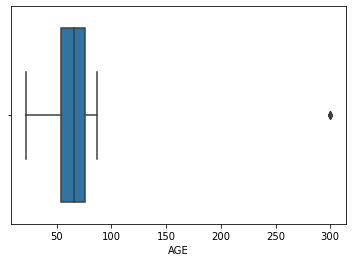

In [233]:
sns.boxplot(vte_uid['AGE'])

/Users/kexinzhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE'>

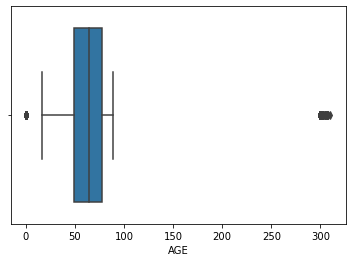

In [234]:
sns.boxplot(nvte_uid['AGE'])

In [619]:
new_vte_uid = vte_uid[vte_uid['AGE']<300].reset_index(drop=True)
new_nvte_uid = nvte_uid[(nvte_uid['AGE']<300) & (nvte_uid['AGE']>0)].reset_index(drop=True)

In [620]:
new_vte_uid.shape

(193, 30)

In [621]:
new_nvte_uid.shape

(5085, 28)

##### Length stay check

/Users/kexinzhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LENGTH_STAY'>

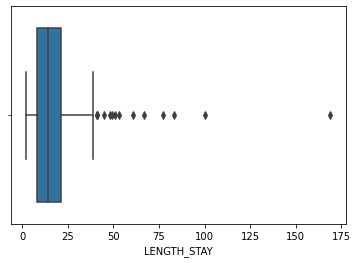

In [622]:
sns.boxplot(new_vte_uid['LENGTH_STAY'])

/Users/kexinzhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LENGTH_STAY'>

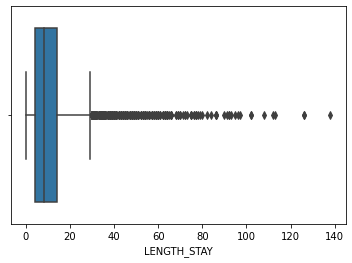

In [623]:
sns.boxplot(new_nvte_uid['LENGTH_STAY'])

#### admit times check

/Users/kexinzhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ADMIT_TIMES'>

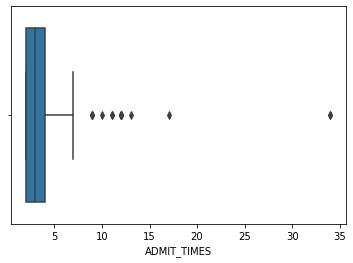

In [624]:
sns.boxplot(new_vte_uid['ADMIT_TIMES'])

/Users/kexinzhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ADMIT_TIMES'>

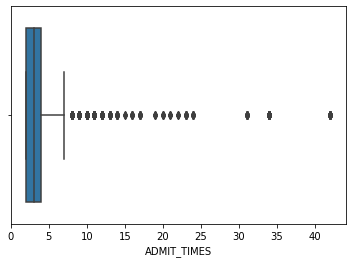

In [625]:
sns.boxplot(new_nvte_uid['ADMIT_TIMES'])

#### readmit days check

/Users/kexinzhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='READMIT_DAY'>

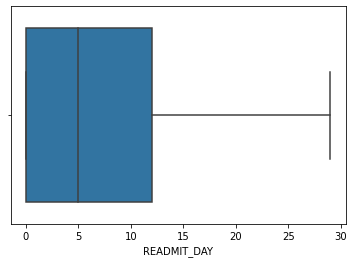

In [626]:
sns.boxplot(new_vte_uid['READMIT_DAY'])

/Users/kexinzhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='READMIT_DAY'>

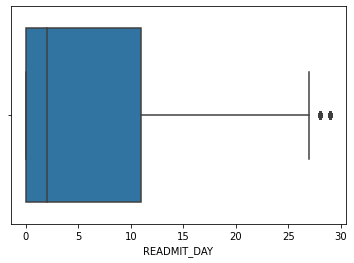

In [627]:
sns.boxplot(new_nvte_uid['READMIT_DAY'])

#### Drop Columns

In [628]:
new_nvte_uid.columns

Index(['SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME',
       'ADMISSION_TYPE', 'ADMISSION_LOCATION', 'DISCHARGE_LOCATION',
       'INSURANCE', 'LANGUAGE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY',
       'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG',
       'HAS_CHARTEVENTS_DATA', 'GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN',
       'EXPIRE_FLAG', 'AGE', 'ADMIT_TIMES', 'LENGTH_STAY', 'READMIT_DAY'],
      dtype='object')

In [629]:
new_vte_uid = new_vte_uid.drop(['SEQ_NUM', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_LOCATION', 'LANGUAGE', 'RELIGION', 'MARITAL_STATUS', 'EDREGTIME', 'EDOUTTIME', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG', 'AGE_RANGE', 'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'DISCHARGE_LOCATION'],axis=1)

In [630]:
new_nvte_uid = new_nvte_uid.drop(['ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_LOCATION', 'LANGUAGE', 'RELIGION', 'MARITAL_STATUS', 'EDREGTIME', 'EDOUTTIME', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG', 'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'DISCHARGE_LOCATION'],axis=1)

# Normalize Continuous Variables

In [631]:
# Normalize Data
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

### Age

In [632]:
new_vte_uid['AGE'] = NormalizeData(new_vte_uid['AGE'])

In [633]:
new_nvte_uid['AGE'] = NormalizeData(new_nvte_uid['AGE'])

### Length Stay

In [634]:
new_vte_uid['LENGTH_STAY'] = NormalizeData(new_vte_uid['LENGTH_STAY'])

In [635]:
new_nvte_uid['LENGTH_STAY'] = NormalizeData(new_nvte_uid['LENGTH_STAY'])

### Admit Times

In [636]:
new_vte_uid['ADMIT_TIMES'] = NormalizeData(new_vte_uid['ADMIT_TIMES'])

In [637]:
new_nvte_uid['ADMIT_TIMES'] = NormalizeData(new_nvte_uid['ADMIT_TIMES'])

### Readmit Days

In [638]:
new_vte_uid['READMIT_DAY'] = NormalizeData(new_vte_uid['READMIT_DAY'])

In [639]:
new_nvte_uid['READMIT_DAY'] = NormalizeData(new_nvte_uid['READMIT_DAY'])

# Grouping For Diagnosis

In [283]:
# import mannual group csv file
diag_norm = pd.read_csv('Diagnosis ICD9_Code - Number.csv')
diag_V = pd.read_csv('Diagnosis ICD9_Code - V.csv')
diag_E = pd.read_csv('Diagnosis ICD9_Code - E.csv')

In [284]:
# subset the diagnosis dataframe and use it to create a dictionary which stores SID & HID as keys and ICD9_CODE as values
dia_subset = df_dia_icd[['SUBJECT_ID', 'HADM_ID', 'ICD9_CODE']].reset_index(drop=True)

In [359]:
dia_subset = dia_subset.dropna(subset=['ICD9_CODE'])

In [291]:
#dia_subset[(dia_subset['SUBJECT_ID']== 20) & (dia_subset['HADM_ID']== 157681)] # for test

## Create an dictionary to store information about icd9 code for each SID and HID

In [361]:
diagnosis_dict = {k: g["ICD9_CODE"].tolist() for k,g in dia_subset.groupby(['SUBJECT_ID', 'HADM_ID'])}

In [436]:
# diagnosis_dict.get((20, 157681)) # for test dictionary is correct

In [437]:
# diagnosis_dict.get((20, 157681))[0][:3]

In [438]:
# diagnosis_dict.get((109, 173633))[-1]

In [754]:
#diagnosis_dict.get((17155,160858))

## Create a function for each row to add their diagnosis information

In [378]:
# create a new dataframe recording SID & HID & grouping information
new_diag = dia_subset[['SUBJECT_ID', 'HADM_ID']].drop_duplicates().reset_index(drop=True)

In [379]:
col_list = list(diag_norm['col_name'].values)+list(diag_V['col_name'].values)+list(diag_E['col_name'].values)

In [380]:
new_diag[col_list] = 0

/Users/kexinzhang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3645: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = value


In [381]:
# vte_id = vte_id[['SUBJECT_ID','HADM_ID']].apply(tuple, axis=1)
def grouping(row):
    SID = row['SUBJECT_ID']
    HID = row['HADM_ID']
    ID_tuple = (SID, HID)
    ICD_list = diagnosis_dict.get(ID_tuple)
    #print('ok')
    
    for i in range(len(ICD_list)):
        digit = str(ICD_list[i])
        
        # case start with V
        if digit[0] == 'V':
            digit = int(digit[1:3])
            
            for index, r in diag_V.iterrows():
                if digit >= r['low'] and digit <= r['high']:
                    row[r['col_name']] = 1
                    break
                    
        elif digit[0] == 'E':
            digit = int(digit[1:4])
            
            for index, r in diag_E.iterrows():
                if digit >= r['low'] and digit <= r['high']:
                    row[r['col_name']] = 1
                    break
                    
        else:
            digit = int(digit[:3])
            
            for index, r in diag_norm.iterrows():
                if digit >= r['low'] and digit <= r['high']:
                    row[r['col_name']] = 1 
                    break
    return row

In [750]:
#new_diag = new_diag.apply(grouping, axis=1)

In [751]:
# temp = new_diag[(new_diag['SUBJECT_ID'] == 17155) & (new_diag['HADM_ID'] == 160858)] # test

In [752]:
# code = list(temp.apply(lambda row: row[row == 1].index.tolist(), axis=1)) # test

In [753]:
# code[0] #test

In [427]:
new_diag.shape

(58929, 186)

# Grouping For Procedure

In [432]:
# import mannual group csv file
proce_code = pd.read_csv('Procedure ICD9_Code.csv')

In [423]:
proce_subset = df_proce[['SUBJECT_ID', 'HADM_ID', 'ICD9_CODE']].reset_index(drop=True)

In [425]:
#proce_subset.isna().sum()

## Create dictionary for procedure to store icd9 code

In [426]:
procedure_dict = {k: g["ICD9_CODE"].tolist() for k,g in proce_subset.groupby(['SUBJECT_ID', 'HADM_ID'])}

In [507]:
# str(procedure_dict.get((2592, 130856)))

## Create a function for each row to add their procedure information

In [487]:
new_proce = proce_subset[['SUBJECT_ID', 'HADM_ID']].drop_duplicates().reset_index(drop=True)

In [488]:
p_col_list = list(proce_code['col_name'].values)
p_col_list = list(str(i) for i in p_col_list)

In [489]:
new_proce[p_col_list] = 0

/Users/kexinzhang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3645: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = value


In [493]:
def pgrouping(row):
    SID = row['SUBJECT_ID']
    HID = row['HADM_ID']
    ID_tuple = (SID, HID)
    ICD_list = procedure_dict.get(ID_tuple)
    
    for i in range(len(ICD_list)):
        digit = int(str(ICD_list[i])[:2])
        colname = str(digit)
        
        row[colname] = 1
        
    return row
        

In [494]:
new_proce = new_proce.apply(pgrouping, axis=1)

In [747]:
#temp2 = new_proce[(new_proce['SUBJECT_ID'] == 17155) & (new_proce['HADM_ID'] == 160858)]

In [748]:
#code2 = list(temp2.apply(lambda row: row[row == 1].index.tolist(), axis=1))

In [749]:
#code2

In [511]:
new_proce.shape

(52243, 102)

# Merge diagnosis and procedure

In [677]:
new_dia_pro = pd.merge(new_diag, new_proce, how='outer', on=['SUBJECT_ID', 'HADM_ID'])

In [746]:
#new_dia_pro[(new_dia_pro['SUBJECT_ID'] == 17155) & (new_dia_pro['HADM_ID'] == 160858)]

# Group For Lab Test

In [530]:
# import data
d_labitem = pd.read_csv('D_LABITEMS.csv')
labevent = pd.read_csv('LABEVENTS.csv')

In [572]:
item_cate = d_labitem[['ITEMID', 'CATEGORY']]
labevent_sub = labevent[['SUBJECT_ID', 'HADM_ID', 'ITEMID']]

In [573]:
labevent_sub = labevent_sub.dropna(subset=['HADM_ID']).reset_index(drop=True)
labevent_sub['HADM_ID'] = labevent_sub['HADM_ID'].astype(int)

In [574]:
lab_cate = pd.merge(labevent_sub, item_cate, how='inner', on='ITEMID')

In [575]:
lab_cate = lab_cate.drop(['ITEMID'], axis=1)
lab_cate['CATEGORY'] = lab_cate['CATEGORY'].str.lower()
lab_cate = lab_cate.drop_duplicates().reset_index(drop=True)

## Create a dictionary to store lab test category

In [590]:
lab_dict = {k: g["CATEGORY"].tolist() for k,g in lab_cate.groupby(['SUBJECT_ID', 'HADM_ID'])}

## Create a function to add categories for each row

In [598]:
lcol_name = list(lab_cate['CATEGORY'].unique())

In [600]:
new_lab = lab_cate[['SUBJECT_ID','HADM_ID']].drop_duplicates().reset_index(drop=True)

In [602]:
new_lab[lcol_name] = 0

In [604]:
def lab_grouping(row):
    SID = row['SUBJECT_ID']
    HID = row['HADM_ID']
    ID_tuple = (SID, HID)
    cate_list = lab_dict.get(ID_tuple)
    
    for i in range(len(cate_list)):
        row[cate_list[i]] = 1
        
    return row

In [609]:
new_lab = new_lab.apply(lab_grouping, axis=1)

In [745]:
#new_lab[(new_lab['SUBJECT_ID'] == 17155) & (new_lab['HADM_ID'] == 160858)]

# Merge dia_pro with Lab test

In [681]:
new_allgroup = pd.merge(new_dia_pro, new_lab, how='outer', on=['SUBJECT_ID', 'HADM_ID'])

In [744]:
#new_allgroup[(new_allgroup['SUBJECT_ID'] == 17155) & (new_allgroup['HADM_ID'] == 160858)]

# Merge with Group I

In [684]:
new_vte_uid.shape

(193, 11)

In [732]:
new_vte = pd.merge(new_vte_uid, new_allgroup, how='inner', on=['SUBJECT_ID', 'HADM_ID'])

In [733]:
new_vte.columns

Index(['SUBJECT_ID', 'HADM_ID', 'ADMISSION_TYPE', 'INSURANCE', 'ETHNICITY',
       'DIAGNOSIS', 'GENDER', 'AGE', 'ADMIT_TIMES', 'LENGTH_STAY',
       ...
       '93', '94', '95', '96', '97', '98', '99', 'chemistry', 'hematology',
       'blood gas'],
      dtype='object', length=298)

In [734]:
new_vte = new_vte.dropna().reset_index(drop=True)

In [735]:
new_vte.shape

(186, 298)

In [736]:
new_vte.iloc[:, 11:] = new_vte.iloc[:, 11:].astype(int)

In [737]:
new_vte.to_csv('New_VTE.csv') # export to csv file

# Merge with Group II

In [645]:
new_nvte_uid.shape

(5085, 11)

In [738]:
new_nvte = pd.merge(new_nvte_uid, new_allgroup, how='left', on=['SUBJECT_ID', 'HADM_ID'])

In [739]:
new_nvte['chemistry'] = new_nvte['chemistry'].fillna(0)
new_nvte['hematology'] = new_nvte['hematology'].fillna(0)
new_nvte['blood gas'] = new_nvte['blood gas'].fillna(0)

In [740]:
new_nvte = new_nvte.dropna().reset_index(drop=True)

In [741]:
new_nvte.shape

(4444, 298)

In [742]:
new_nvte.iloc[:, 11:] = new_nvte.iloc[:, 11:].astype(int)

In [743]:
new_nvte.to_csv('New_NVTE.csv')